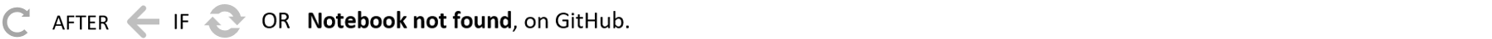

# Wikipedia Notable Life Expectancy

## Notebook 1:  Data Collection

### Contents
This notebook covers Web scraping through exporting the complete raw dataset to a SQLite database.

### Instructions
#### Options for Running this Notebook:
1. Clone the repository:
    - Delete the following files that are generated by this notebook:
        - [wp_life_expect_raw_complete.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_raw_complete.db)
        - [rescrape_df.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/rescrape_df.csv)
        - [rescrape_df_2nd.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/rescrape_df_2nd.csv)
        - [rescrape_df_3rd.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/rescrape_df_3rd.csv)
        - [rescrape_df_4th.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/rescrape_df_4th.csv)
    - Navigate to the cloned repository in Jupyter and open the notebook to run it.
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).
2. Save the notebook and the following database files to the same working directory:<sup>1</sup>
    - Download the notebook:
        - Click on <kbd>Raw</kbd> above.
        - Save <kbd>Ctrl</kbd> + <kbd>S</kbd>
    - Follow the link to each database file and click <kbd>Download</kbd>, then move files to the same directory as the notebook:<sup>2</sup>
        - [wp_deaths_94_to_22.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_94_to_22.db)
        - [wp_reference_counts_2.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_reference_counts_2.db)
        - [wp_deaths_June_2022.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_June_2022.db)
        - [refs2.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/refs2.db)
        - [refs3.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/refs3.db)
        - [refs4.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/refs4.db)
        - [refs5.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/refs5.db)
    - In Jupyter, navigate to the directory in which the notebook and files are saved, to open and run the notebook.  
    - Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions).
    
#### The Web-scraping steps are reproducible, with the following caveats:
- Wikipedia evolves with contribution and editing, so scraping even the identical dates will likely result in at least some minor variation in the raw dataset.
- Converting the raw data for what an individual was notable, into a predictive categorical feature, is a programmatically-driven, manual process.  Though arguably more robust than straight manual entry, it has the same specificity to the raw data.  If new data is scraped, particularly for a different time period, it will need this cleaning step (Notebooks 5-8) recoded to match the new data (no small feat!).
- Due to the above limitations, reproducing the scraping steps separately as an exercise in Web scraping with Scrapy is more feasible than aiming to use a newly scraped version of the data to run the notebooks for this project, from start to finish.  Starting by running this notebook with the data previously scraped in the above list of files is recommended.  Alternatively, any entry point from Notebook 2 or later can be chosen with its corresponding version of the dataset.
- For Web scraping follow [these instructions](https://www.youtube.com/watch?v=ooNngLWhTC4) from Frank Andrade, to set up Anaconda virtual environment and Scrapy.<sup>3</sup>
    1. Clone the repository.
    1. Refer to [Application and Package Versions](https://github.com/teresahanak/wikipedia-life-expectancy#application-and-package-versions) to match the virtual environment.
    1. Create virtual environment with Anaconda Navigator.
    1. Install Scrapy in the virtual environment.
    1. Synch PyCharm to the Anaconda virtual environment.
    1. Install protego.
    1. Move the cloned repository into the virtual environment.
    1. The subsequent steps are outlined in this notebook, following Scrapy instruction from [Frank Andrade's course](https://www.udemy.com/course/web-scraping-course-in-python-bs4-selenium-and-scrapy/).<sup>4</sup>


### Data Dictionary for Scraped Data
- **month_year**:  Month and year of the individual's death
- **day**:  Day of the month of the individual's death
- **name**:  Name of the individual
- **info**:  Combined Wikipedia-defined fields:
> Name, age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, cause of death (if known), and reference.<sup>5</sup>
>
- **link**:  Link to an individual's page
- **num_references**:  Number of references for individual's page

## Data Collection
- Data was collected from 6/9/22 to 6/10/22, with Scrapy. 

### 6/9/2022
- Wikipedia's [List of Deaths by Year](https://en.wikipedia.org/wiki/Lists_of_deaths_by_year), contains entries for as early as 1987, to the present day.<sup>6</sup>
- 1994 was chosen as the start year for collection, as it is the first year with entries following the current format: "Name, age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, cause of death (if known), and reference."<sup>7</sup>
- For ease of pagination, [Deaths in January 1994](https://en.wikipedia.org/wiki/Deaths_in_January_1994) was the start url for scraping, proceeding month by month through subsequent pages.<sup>8</sup>
- Spider ["by_year"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/by_year.py) scraped `month_year`, `day`, `name`, `info`, and `link`, for each entry, on each month's page.  
- The project's [pipelines.py](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/pipelines.py)\* wrote results to SQLite table *wp_deaths_94_to_22* within [wp_deaths_94_to_22.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_94_to_22.db).  This scraping was successful for January, 1994 through May, 2022 data.
- [Deaths in 2022 -- June](https://en.wikipedia.org/wiki/Deaths_in_2022#June)--the current month's page, at the time of scraping--varied in format, and was therefore scraped separately, after `num_references` was scraped for the previous entries.<sup>9</sup>
- The original order of entries was preserved by Spider ["by_year"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/by_year.py) in [wp_deaths_94_to_22.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_94_to_22.db).  Scrapy trades pagination order for speed, which is noticable when pagination is of higher magnitude.  Therefore, scraping each entry's page for number of references was done separately, as the order was sure to vary. Spider ["references"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/references.py) scraped for number of references.  The project's [pipelines.py](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/pipelines.py)\* wrote results to SQLite table *wp_reference_counts_2* in [wp_reference_counts_2.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_reference_counts_2.db), with the results falling ~13,000 rows short of the 133,769 rows captured by Spider ["by_year"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/by_year.py).
- Finally, the [June, 2022](https://en.wikipedia.org/wiki/Deaths_in_2022#June) page was scraped by Spider ["June_2022"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/June_2022.py), successfully capturing all of the previous fields, including number of references.  Note that the number of pages was some order of magnitude smaller than for the previous iteration.<sup>10</sup>
- The project's [pipelines.py](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/pipelines.py)\* wrote results to SQLite table *wp_deaths_June_2022* in [wp_deaths_June_2022.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_June_2022.db), resulting in 145 entries from the first part of June, 2022.

### 6/10/2022
The remaining data collection steps are outlined in this notebook:
#### 1. Reading, Sampling, and Checking Data Shape
- SQLite tables *wp_deaths_94_to_22*, *wp_reference_counts_2*, and *wp_June_2022* were read in as pandas dataframes. 

#### 2. Combining Dataframes
- Dataframes for wp_deaths_94_to_22 and wp_reference_counts_2 were combined using `link` as the unique identifier.
- Dataframe for wp_deaths_June_2022 was added.  

#### 3. Duplicate Rows
- 9 rows of duplicate entries were dropped. 

#### 4. Missing Values
- 5 rows missing essential data were dropped.
- 6 entries had missing `name` and `num_references`, but contained the name in the `info` feature, to be extracted later during data cleaning.  As these entries had no associated page, their `num_references` was set equal to to 0.  

#### 5. Missing `num_references`
- New Spiders were created with a single modification to the original XPath for the original ["by_year"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/by_year.py) Spider, to match a variation on the pages for links with missing `num_references`.  
- Those pages were then were rescraped iteratively by Spiders ["refs2"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs2.py), ["refs3"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs3.py), ["refs4"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs4.py), and ["refs5"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs5.py).
- The project's [pipelines.py](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/pipelines.py)\* wrote their respective results to SQLite tables *refs2* in [refs2.db](https://github.com/teresahanak/wikipedia-notable-deaths/blob/main/refs2.db), *refs3* in [refs3.db](https://github.com/teresahanak/wikipedia-notable-deaths/blob/main/refs3.db), *refs4* in [refs4.db](https://github.com/teresahanak/wikipedia-notable-deaths/blob/main/refs4.db), and *refs5* in [refs5.db](https://github.com/teresahanak/wikipedia-notable-deaths/blob/main/refs5.db).
- During each iteration, the additional `num_references` were added to the main dataset and remaining links with missing `num_references` values were identified.
- After the final iteration, 92 entries remained with missing `num_references` that were all missing an associated page, so `num_references` was set equal to to 0.  These entries contained all of the other relevant features, so were preserved.
- The resultant raw dataset has 133,900 rows and 6 columns.

### 6/17/22
- The table from [A List of Nationalities - WorldAtlas](https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html) was scraped by Spider, ["nations"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/nations.py), and saved to [nations.csv](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/nations.csv) for use in [Notebook 3: Data Cleaning Part 2](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean2_thanak_2022_06_17.ipynb).<sup>11</sup>

\*  The current version of [pipelines.py](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/pipelines.py) reflects its use by the most recent project spider crawled, as it is adapted and reused for each spider within the [Scrapy project folder](https://github.com/teresahanak/wikipedia-life-expectancy/tree/main/wikipedia_life_expectancy).

## Importing Necessary Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To help with reading and manipulating data
import pandas as pd

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

<IPython.core.display.Javascript object>

## Data Overview

<a id='step1'></a>
### Reading, Sampling, and Checking Data Shape

### [January 1994 through May 2022 Data](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_94_to_22.db) (without number of references)

In [2]:
# Reading the wp_deaths_94_to_22 dataset from sql db and table
conn = sql.connect("wp_deaths_94_to_22.db")
raw_94_to_22 = pd.read_sql("SELECT * FROM wp_deaths_94_to_22", conn)

# Making a working copy
df_94_to_22 = raw_94_to_22.copy()

# Checking the shape
print(f"There are {df_94_to_22.shape[0]} rows and {df_94_to_22.shape[1]} columns.")

# Checking first 2 rows of the data
df_94_to_22.head(2)

There are 133769 rows and 5 columns.


,month_year,day,name,info,link
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer)
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df_94_to_22.tail(2)

,month_year,day,name,info,link
133767,May 2022,31,Dave Smith,", 72, American sound engineer, founder of Sequential.",https://en.wikipedia.org/wiki/Dave_Smith_(engineer)
133768,May 2022,31,Wang Zherong,", 86, Chinese tank designer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Wang_Zherong


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df_94_to_22.sample(5)

,month_year,day,name,info,link
71018,August 2014,17,Wolfgang Leonhard,", 93, German historian, last living member of the Ulbricht Group.",https://en.wikipedia.org/wiki/Wolfgang_Leonhard
4119,August 1995,16,Howie Shannon,", 72, American basketball player and coach, lung cancer.",https://en.wikipedia.org/wiki/Howie_Shannon
124813,June 2021,30,Arthur M. Poskanzer,", 90, American experimental physicist.",https://en.wikipedia.org/wiki/Arthur_M._Poskanzer
79268,November 2015,4,Ron Drzewiecki,", 82, American football player (Chicago Bears).",https://en.wikipedia.org/wiki/Ron_Drzewiecki
46871,August 2010,23,Gareth Williams,", 31, British intelligence officer (GCHQ seconded to MI6). (body discovered on this date)",https://en.wikipedia.org/wiki/Death_of_Gareth_Williams


<IPython.core.display.Javascript object>

#### Observations:
- There are 133,769 rows and 5 columns in the data from January, 1994 through May, 2022.
- The number of references was scraped separately.

### [January 1994 through May 2022 Reference Count Data](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_reference_counts_2.db)

In [5]:
# Reading the wp_reference_counts_2 dataset from sql db and table
conn = sql.connect("wp_reference_counts_2.db")
raw_reference_counts = pd.read_sql("SELECT * FROM wp_reference_counts_2", conn)

# Making a working copy
df_reference_counts = raw_reference_counts.copy()

# Checking the shape
print(
    f"There are {df_reference_counts.shape[0]} rows and {df_reference_counts.shape[1]} columns."
)

# Checking first 2 rows of the data
df_reference_counts.head(2)

There are 120368 rows and 2 columns.


,link,num_references
0,https://en.wikipedia.org/wiki/Lys_Gauty,5
1,https://en.wikipedia.org/wiki/William_Chappell_(dancer),21


<IPython.core.display.Javascript object>

In [6]:
# Checking last 2 rows of the data
df_reference_counts.tail(2)

,link,num_references
120366,https://en.wikipedia.org/wiki/Shirley_Thomas_(USC_professor),6
120367,https://en.wikipedia.org/wiki/James_Doohan,52


<IPython.core.display.Javascript object>

In [7]:
# Checking a sample of the data
df_reference_counts.sample(5)

,link,num_references
91335,https://en.wikipedia.org/wiki/Rick_James,56
54580,https://en.wikipedia.org/wiki/Kenneth_Partridge,2
102829,https://en.wikipedia.org/wiki/Fred_Naumetz,1
66905,https://en.wikipedia.org/wiki/Carlos_Hoffmann,2
36709,https://en.wikipedia.org/wiki/Thomas_Hynes,15


<IPython.core.display.Javascript object>

#### Observations:
- Here, we see that there are ~13,000 fewer rows for the number of references data, indicating some of the individuals' pages were not successfully scraped.
- After combining the three dataframes, we can examine those pages and reattempt scraping for the missing information.

### [June 2022 Data](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_deaths_June_2022.db)

In [8]:
# Reading the wp_deaths_June_2022 dataset from sql db and table
conn = sql.connect("wp_deaths_June_2022.db")
raw_June_2022 = pd.read_sql("SELECT * FROM wp_deaths_June_2022", conn)

# Making a working copy
df_June_2022 = raw_June_2022.copy()

# Checking the shape
print(f"There are {df_June_2022.shape[0]} rows and {df_June_2022.shape[1]} columns.")

# Checking first 2 rows of the data
df_June_2022.head(2)

There are 145 rows and 6 columns.


,month_year,day,name,info,link,num_references
0,June 2022,8,Mladen Frančić,", 67, Croatian football player and manager (Vrbovec, Podravina, Al-Watani Club).",https://en.wikipedia.org/wiki/Mladen_Fran%C4%8Di%C4%87,1
1,June 2022,6,Valery Ryumin,", 82, Russian cosmonaut (Soyuz 25, Soyuz 32, Soyuz 35).",https://en.wikipedia.org/wiki/Valery_Ryumin,2


<IPython.core.display.Javascript object>

#### Observations:
- The June, 2022 data does not follow the same row order as the previous dataframe, which was in order of day of the month. 
- For continuity, before concatenating the two dataframes, we will sort June, 2022 by day.

In [9]:
# Sorting by day
df_June_2022.sort_values(by="day", inplace=True)

# Re-checking first 2 rows of the data
df_June_2022.head(2)

,month_year,day,name,info,link,num_references
26,June 2022,1,Richard Oldcorn,", 84, English Olympic fencer (1964, 1968, 1972).",https://en.wikipedia.org/wiki/Richard_Oldcorn,5
20,June 2022,1,István Szőke,", 75, Hungarian footballer (Ferencváros, national team), stroke.",https://en.wikipedia.org/wiki/Istv%C3%A1n_Sz%C5%91ke,2


<IPython.core.display.Javascript object>

In [10]:
# Checking last 2 rows of the data
df_June_2022.tail(2)

,month_year,day,name,info,link,num_references
8,June 2022,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion (1980) and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2
5,June 2022,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3


<IPython.core.display.Javascript object>

In [11]:
# Checking a sample of the data
df_June_2022.sample(5)

,month_year,day,name,info,link,num_references
104,June 2022,5,Alex Magaisa,", 46, Zimbabwean academic and political advisor.",https://en.wikipedia.org/wiki/Alex_Magaisa,11
116,June 2022,6,Yves-Marie Vérove,", 72, French basketball player and coach.",https://en.wikipedia.org/wiki/Yves-Marie_V%C3%A9rove,2
6,June 2022,6,Michele Scandiffio,", 93, Italian Roman Catholic prelate, archbishop of Acerenza (1988–2005).",https://en.wikipedia.org/wiki/Michele_Scandiffio,1
58,June 2022,2,Paul Coppo,", 83, American Olympic ice hockey player (1964).",https://en.wikipedia.org/wiki/Paul_Coppo,3
125,June 2022,7,Trudy Haynes,", 95, American journalist (WXYZ-TV, KYW-TV).",https://en.wikipedia.org/wiki/Trudy_Haynes,13


<IPython.core.display.Javascript object>

#### Observations:
- Now, we are ready to combine the three dataframes.

<a id='step2'></a>
## Combining Dataframes

### Adding Number of References to 1994 through May 2022 Data

In [12]:
# Adding num_references column to 1994 through May 2022 data
df_combined = pd.merge(df_94_to_22, df_reference_counts, how="left", on="link")

# Checking first 2 rows of the data
df_combined.head(2)

,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

### Adding June 2022 Data

In [13]:
# Adding Juned 2022 data
df_combined = pd.concat([df_combined, df_June_2022], ignore_index=True)

# Making a working copy
df = df_combined.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 133914 rows and 6 columns.


,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

In [14]:
# Checking last 2 rows of the data
df.tail(2)

,month_year,day,name,info,link,num_references
133912,June 2022,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion (1980) and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2
133913,June 2022,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3


<IPython.core.display.Javascript object>

In [15]:
# Checking a sample of the data
df.sample(5)

,month_year,day,name,info,link,num_references
24091,September 2003,5,Benny Schnoor,", 80, Danish Olympic cyclist.",https://en.wikipedia.org/wiki/Benny_Schnoor,1
74409,February 2015,5,Stay Gold,", 20, Japanese Thoroughbred racehorse.",https://en.wikipedia.org/wiki/Stay_Gold_(horse),2
123589,May 2021,16,Richard L. Rubenstein,", 97, American rabbi and writer.",https://en.wikipedia.org/wiki/Richard_L._Rubenstein,9
77211,July 2015,5,Aleksandra Mróz,", 80, Polish Olympic swimmer.",https://en.wikipedia.org/wiki/Aleksandra_Mr%C3%B3z,2
24084,September 2003,5,Gordon Binkerd,", 87, American composer, pianist and professor.",https://en.wikipedia.org/wiki/Gordon_Binkerd,5


<IPython.core.display.Javascript object>

#### Confirming Correct Number of Resultant Entries

In [16]:
# Confirming correct number of total rows
print(f"There are {df_94_to_22.shape[0] + df_June_2022.shape[0]} expected total rows.")

del df_94_to_22, df_reference_counts, df_June_2022

There are 133914 expected total rows.


<IPython.core.display.Javascript object>

#### Observations:
- We have successfully combined the three dataframes.
- Now, we can check for data types, duplicates, and missing values.

<a id='step3'></a>
## Checking Data Types, Duplicates, and Null Values

### Data types

In [17]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133914 entries, 0 to 133913
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   month_year      133914 non-null  object
 1   day             133914 non-null  object
 2   name            133903 non-null  object
 3   info            133914 non-null  object
 4   link            133914 non-null  object
 5   num_references  120637 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


<IPython.core.display.Javascript object>

#### Observations:
- There are 6 columns, all of object type.
- `name` and `num_references` both have missing values.
- The data is in a very raw format.  There are columns that have combined information that will need to be extracted.
- For now, we will leave all as object type.

<a id='step3'></a>
### Duplicate Rows

In [18]:
# Checking duplicate rows
df.duplicated().sum()

9

<IPython.core.display.Javascript object>

#### Observations:
- There are 9 duplicate rows that we will drop now.

In [19]:
# Drop duplicate rows
df.drop_duplicates(inplace=True, ignore_index=True)

# Re-check shape
df.shape

(133905, 6)

<IPython.core.display.Javascript object>

<a id='step4'></a>
### Missing Values

In [20]:
# Check percentage of null values by column
df.isnull().sum() / df.count() * 100

month_year        0.000
day               0.000
name              0.008
info              0.000
link              0.000
num_references   11.007
dtype: float64

<IPython.core.display.Javascript object>

In [21]:
# Checking number of missing values per row
df.isnull().sum(axis=1).value_counts()

0    120628
1     13266
2        11
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- The number of rows missing only 1 value appears consistent with our anticipated missing `num_references`.
- There are 11 rows that are each missing 2 values.  Let us take a closer look at these rows.

In [22]:
# Checking the rows that are missing values for 2 columns
missing_2 = df[df.isnull().sum(axis=1) == 2]
missing_2

,month_year,day,name,info,link,num_references
18937,August 2001,11,None,"Kevin Kowalcyk, 2, known for eating a hamburger contaminated with E. coli O157:H7.",https://en.wikipedia.orgNone,NaN
24985,January 2004,22,None,"Vincent Palmer, 37, British criminal.",https://en.wikipedia.orgNone,NaN
27458,March 2005,1,None,"Barry Stigler, 57, American voice actor.",https://en.wikipedia.orgNone,NaN
34077,July 2007,11,None,"Nana Gualdi, 75, German singer and actress.",https://en.wikipedia.orgNone,NaN
35097,November 2007,11,None,,https://en.wikipedia.orgNone,NaN
41075,May 2009,18,None,Either killed in a missile attack or shot:\n,https://en.wikipedia.orgNone,NaN
64771,September 2013,29,None,"Scott Workman, 47, American stuntman (, , ), cancer.",https://en.wikipedia.orgNone,NaN
76024,April 2015,29,None,Notable convicted drug traffickers executed by Indonesian firing squad:\n,https://en.wikipedia.orgNone,NaN
105871,August 2019,2,None,"Japanese convicted murderers, executed by hanging.\n",https://en.wikipedia.orgNone,NaN
106617,September 2019,12,None,"Thami Shobede, 31, Singer Songwriter",https://en.wikipedia.orgNone,NaN


<IPython.core.display.Javascript object>

#### Observations:
- We can see that multiple rows are missing `name`, but have the name in `info`, so we can extract it later.  
- The missing link itself is not of concern as it serves only as a means by which to retrieve the `num_references` value.
- However, in the event of any future hard-coding, we will need to avoid using the link as the unique identifier for these entries.
- As there is no associated link for the individual, we can safely replace the NaN `num_references` values with 0, for rows with extractable names.
- We can proceed with removing the rows that lack an extractable name, as they also lack other information necessary for the analysis.

In [23]:
# List of rows to keep
keep_rows = [18937, 24985, 27458, 34077, 64771, 106617]

# For loop to replace num_references NaNs with 0 for rows with extractable names
for row in keep_rows:
    df.loc[row, "num_references"] = 0

# List of rows to remove
remove_rows = [index for index in missing_2.index if index not in keep_rows]
del missing_2

# Dropping rows
df.drop(remove_rows, inplace=True)
df.reset_index(inplace=True, drop=True)

# Re-checking shape
df.shape

(133900, 6)

<IPython.core.display.Javascript object>

In [24]:
# Re-check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133900 entries, 0 to 133899
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   month_year      133900 non-null  object
 1   day             133900 non-null  object
 2   name            133894 non-null  object
 3   info            133900 non-null  object
 4   link            133900 non-null  object
 5   num_references  120634 non-null  object
dtypes: object(6)
memory usage: 6.1+ MB


<IPython.core.display.Javascript object>

#### Observations:
- There are now only 6 rows with missing `name`, corresponding to the names we identified in `info`, that we will extract later.
- The remaining missing values are all for `num_references`, so we can proceed to make another attempt at scraping this information.
- Let us check a sample of these rows.

In [25]:
# Checking sample of rows missing num_references
df[df["num_references"].isna()].sample(5)

,month_year,day,name,info,link,num_references
119694,January 2021,20,Harthorne Wingo,", 73, American basketball player (Allentown Jets, New York Knicks, Pallacanestro Cantù).",https://en.wikipedia.org/wiki/Harthorne_Wingo,NaN
45011,April 2010,4,Kelly Moran,", 49, American motorcycle speedway racer, complications from emphysema.",https://en.wikipedia.org/wiki/Kelly_Moran_(speedway_rider),NaN
76417,May 2015,23,Marcus Belgrave,", 78, American jazz trumpeter, heart failure.",https://en.wikipedia.org/wiki/Marcus_Belgrave,NaN
117008,October 2020,27,Rolf Stumpf,", 74, South African statistician, vice chancellor of Nelson Mandela University (since 2002).",https://en.wikipedia.org/wiki/Rolf_Stumpf,NaN
38982,November 2008,18,"Paul H. Todd, Jr.",", 87, American politician, member of the House of Representatives from Michigan (1965–1967).","https://en.wikipedia.org/wiki/Paul_H._Todd,_Jr.",NaN


<IPython.core.display.Javascript object>

#### Observations:
- Following the links reveals that the pages contain references.  
- Therefore, they either have a variation in the XPath followed for scraping, or Scrapy had an issue with following their links.
- We will export a dataframe of the links to the pages that need to be re-scraped for `num_references`.

In [26]:
# Exporting dataframe of pages to rescrape for num_references
rescrape_df = df[df["num_references"].isna()]["link"]
rescrape_df.to_csv("rescrape_df.csv", index=False)

del rescrape_df

<IPython.core.display.Javascript object>

<a id='step5'></a>
## Missing `num_references` Values

### First Re-scrape with Spider ["refs2"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs2.py)

#### Observations:
- A second iteration of scraping individual pages for number of references reveals variation in the XPath for those pages.
- The new spider, ["refs2"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs2.py), used an updated XPath, with the identified variation.
- As before, we will import and merge the data, examine rows still missing `num_references` and re-scrape them, adjusting the spider's XPath again, if needed.

In [27]:
# Reading the refs2 dataset from sql db and table
conn = sql.connect("refs2.db")
raw_refs2 = pd.read_sql("SELECT * FROM refs2", conn)

# Making a working copy
df_refs2 = raw_refs2.copy()

# Checking the shape
print(f"There are {df_refs2.shape[0]} rows and {df_refs2.shape[1]} columns.")

# Checking first 2 rows of the data
df_refs2.head(2)

There are 7365 rows and 2 columns.


,link,num_references
0,https://en.wikipedia.org/wiki/List_of_American_supercentenarians#Charlotte_Benkner,63
1,https://en.wikipedia.org/wiki/Eugene_Record,11


<IPython.core.display.Javascript object>

In [28]:
# Checking last 2 rows of the data
df_refs2.tail(2)

,link,num_references
7363,https://en.wikipedia.org/wiki/Gunnar_Utterberg,3
7364,https://en.wikipedia.org/wiki/Bill_Sudakis,19


<IPython.core.display.Javascript object>

In [29]:
# Checking a sample of the data
df_refs2.sample(5)

,link,num_references
3440,https://en.wikipedia.org/wiki/Frederic_Mayer,1
1313,https://en.wikipedia.org/wiki/Franti%C5%A1ek_Tikal,2
6888,https://en.wikipedia.org/wiki/Clive_Emsley,6
4208,https://en.wikipedia.org/wiki/Chelsea_Clark,2
3849,https://en.wikipedia.org/wiki/Maria_Lidka,3


<IPython.core.display.Javascript object>

#### Observations:
- We were able to obtain 7365 of the missing values.

#### Adding Missing References to Dataframe

In [30]:
# Adding new num_references column to data
df = pd.merge(df, df_refs2, how="left", on="link")
del df_refs2

# Checking sample of the data
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
84461,August 2016,6,Joani Blank,", 79, American entrepreneur (Good Vibrations), Butterfly vibrator inventor, author and feminist sex educator.",https://en.wikipedia.org/wiki/Joani_Blank,14,NaN
73857,January 2015,10,Brian Clemens,", 83, British screenwriter () and television producer (, ).",https://en.wikipedia.org/wiki/Brian_Clemens,13,NaN
598,April 1994,3,Chad Kinch,", 35, American basketball player, AIDS-related complications.",https://en.wikipedia.org/wiki/Chad_Kinch,4,NaN
2613,February 1995,3,Art Kane,", 69, American photographer, suicide.",https://en.wikipedia.org/wiki/Art_Kane,3,NaN
105582,July 2019,20,Liane Russell,", 95, Austrian-born American geneticist and conservationist.",https://en.wikipedia.org/wiki/Liane_Russell,13,NaN


<IPython.core.display.Javascript object>

In [31]:
# Filling missing values with newly obtained values
df["num_references_x"].fillna(df["num_references_y"], inplace=True)
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
124056,June 2021,2,Eric Mobley,", 51, American basketball player (Milwaukee Bucks, Vancouver Grizzlies), cancer.",https://en.wikipedia.org/wiki/Eric_Mobley,2,NaN
23002,March 2003,12,Herb Banet,", 89, American professional football player (Manchester University, Green Bay Packers).",https://en.wikipedia.org/wiki/Herb_Banet,4,NaN
27088,January 2005,13,Hunter Andrews,", 83, American politician.",https://en.wikipedia.org/wiki/Hunter_Andrews,5,NaN
21864,September 2002,26,Zerach Warhaftig,", 96, Israeli politician, lawyer and rabbi, helped draft and signed Israel's Declaration of Independence.",https://en.wikipedia.org/wiki/Zerach_Warhaftig,8,NaN
48967,February 2011,10,Józef Życiński,", 62, Polish Roman Catholic prelate, Archbishop of Lublin (since 1997), myocardial infarction.",https://en.wikipedia.org/wiki/J%C3%B3zef_%C5%BByci%C5%84ski,1,NaN


<IPython.core.display.Javascript object>

In [32]:
# Dropping new references column and reverting to original column name
df.drop("num_references_y", axis=1, inplace=True)
df.rename(columns={"num_references_x": "num_references"}, inplace=True)
df.head(2)

,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values

In [33]:
# Checking remaining missing values
df.isna().sum()

month_year           0
day                  0
name                 6
info                 0
link                 0
num_references    5895
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have nearly 6000 remaining missing values for `num_references`, so we will iterate through the rescraping again.

In [34]:
# Checking sample of rows missing num_references
df[df["num_references"].isna()].sample(5)

,month_year,day,name,info,link,num_references
133740,May 2022,31,Aripah Damanhuri,", 72, Malaysian actress.",https://en.wikipedia.org/w/index.php?title=Aripah_Damanhuri&action=edit&redlink=1,NaN
116232,September 2020,21,Gilbert Meyer,", 78, French politician, Deputy (1993–2007) and mayor of Colmar (1995–2020).",https://en.wikipedia.org/wiki/Gilbert_Meyer,NaN
84847,August 2016,28,Joe R. Hicks,", 75, American social activist.",https://en.wikipedia.org/wiki/Joe_R._Hicks,NaN
104578,June 2019,2,Luisinho Lemos,", 67, Brazilian football player and manager (America), heart attack.",https://en.wikipedia.org/wiki/Luisinho_Lemos,NaN
75503,April 2015,3,Rocío García Gaytán,", 55, Mexican politician, MP (1997–2000), cancer.",https://en.wikipedia.org/wiki/Roc%C3%ADo_Garc%C3%ADa_Gayt%C3%A1n,NaN


<IPython.core.display.Javascript object>

#### Observations:
- Following the links again reveals that the pages contain references.  
- We will export another dataframe of the links to the pages that need to be re-scraped for `num_references` and examine the pages for alternate XPaths for scraping.

In [35]:
# Exporting dataframe of pages to rescrape for num_references
rescrape_df_2nd = df[df["num_references"].isna()]["link"]
rescrape_df_2nd.to_csv("rescrape_df_2nd.csv", index=False)
del rescrape_df_2nd

<IPython.core.display.Javascript object>

### Second Re-scrape with Spider ["refs3"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs3.py)

#### Observations:
- The XPath matched that of the last scraping iteration for several pages, so the scraping was repeated for the remaining rows with missing `num_references`.

In [36]:
# Reading the refs3 dataset from sql db and table
conn = sql.connect("refs3.db")
raw_refs3 = pd.read_sql("SELECT * FROM refs3", conn)

# Making a working copy
df_refs3 = raw_refs3.copy()

# Checking the shape
print(f"There are {df_refs3.shape[0]} rows and {df_refs3.shape[1]} columns.")

# Checking first 2 rows of the data
df_refs3.head(2)

There are 3633 rows and 2 columns.


,link,num_references
0,https://en.wikipedia.org/wiki/List_of_American_supercentenarians#Grace_Thaxton,63
1,"https://en.wikipedia.org/wiki/Christopher_Prout,_Baron_Kingsland",6


<IPython.core.display.Javascript object>

In [37]:
# Checking last 2 rows of the data
df_refs3.tail(2)

,link,num_references
3631,https://en.wikipedia.org/wiki/Concepci%C3%B3n_Ram%C3%ADrez,8
3632,https://en.wikipedia.org/wiki/Mary_Mahoney_(physician),6


<IPython.core.display.Javascript object>

In [38]:
# Checking a sample of the data
df_refs3.sample(5)

,link,num_references
332,https://en.wikipedia.org/wiki/Bill_Dale_(athlete),0
72,https://en.wikipedia.org/wiki/Andrea_Maltarolli,3
2408,https://en.wikipedia.org/wiki/Tina_St._Claire,4
2247,"https://en.wikipedia.org/wiki/Cristian_G%C3%B3mez_(footballer,_born_1987)",2
3552,https://en.wikipedia.org/wiki/Tom_O%27Connor_(comedian),10


<IPython.core.display.Javascript object>

#### Observations:
- We were able to obtain 3633 of the missing values.

#### Adding Missing References to Dataframe

In [39]:
# Adding new num_references column to data
df = pd.merge(df, df_refs3, how="left", on="link")
del df_refs3

# Checking sample of the data
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
133281,May 2022,10,María Duval,", 95, Argentine actress ().",https://en.wikipedia.org/wiki/Mar%C3%ADa_Duval_(Argentine_actress),9,NaN
103347,April 2019,3,Alina Kabata-Pendias,", 89, Polish chemist and academic, specialist in biogeochemistry and soil science.",https://en.wikipedia.org/wiki/Alina_Kabata-Pendias,4,NaN
57841,September 2012,27,Eddie Bert,", 90, American jazz trombonist.",https://en.wikipedia.org/wiki/Eddie_Bert,5,NaN
126154,August 2021,17,René Quéré,", 89, French painter and ceramist.",https://en.wikipedia.org/wiki/Ren%C3%A9_Qu%C3%A9r%C3%A9,4,NaN
56382,June 2012,29,Vahe Avetyan,", 32, Armenian doctor, brain injury.",https://en.wikipedia.org/wiki/Death_of_Vahe_Avetyan,12,NaN


<IPython.core.display.Javascript object>

In [40]:
# Filling missing values with newly obtained values
df["num_references_x"].fillna(df["num_references_y"], inplace=True)
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
39045,November 2008,25,Randy Gumpert,", 90, American baseball player.",https://en.wikipedia.org/wiki/Randy_Gumpert,6,NaN
95620,March 2018,11,Sir Ken Dodd,", 90, English comedian (Diddy Men), singer (""Tears"") and actor (), chest infection.",https://en.wikipedia.org/wiki/Ken_Dodd,90,NaN
63411,July 2013,11,Eugene Parks Wilkinson,", 94, American naval officer and nuclear power advocate, first CO of the USS Long Beach, founding CEO of the Institute of Nuclear Power Operations.",https://en.wikipedia.org/wiki/Eugene_Parks_Wilkinson,9,NaN
131946,March 2022,11,Giovanni Giuliano,", 72, Italian politician, president of the Province of Imperia (2001–2010).",https://en.wikipedia.org/wiki/Giovanni_Giuliano,2,NaN
49369,March 2011,13,Marko Horvatin,", 91, Croatian Olympic rower.",https://en.wikipedia.org/wiki/Marko_Horvatin,1,1


<IPython.core.display.Javascript object>

In [41]:
# Dropping new references column and reverting to original column name
df.drop("num_references_y", axis=1, inplace=True)
df.rename(columns={"num_references_x": "num_references"}, inplace=True)
df.head(2)

,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values

In [42]:
# Checking remaining missing values
df.isna().sum()

month_year           0
day                  0
name                 6
info                 0
link                 0
num_references    2260
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have 2260 remaining missing values for `num_references`, so we will iterate through the rescraping again.

In [43]:
# Checking sample of rows missing num_references
df[df["num_references"].isna()].sample(5)

,month_year,day,name,info,link,num_references
73659,January 2015,1,Boris Morukov,", 64, Russian physician and cosmonaut, STS-106 mission specialist.",https://en.wikipedia.org/wiki/Boris_Morukov,NaN
133502,May 2022,19,Jerzy Zass,", 84, Polish actor (, , ).",https://en.wikipedia.org/w/index.php?title=Jerzy_Zass&action=edit&redlink=1,NaN
99230,September 2018,17,Captain Raju,", 68, Indian military officer and actor (, , ), complications from a stroke.",https://en.wikipedia.org/wiki/Captain_Raju,NaN
73693,January 2015,3,Adunni Bankole,", 55, Nigerian businesswoman, heart attack.",https://en.wikipedia.org/wiki/Adunni_Bankole,NaN
88767,March 2017,19,John Jeremiah McRaith,", 82, American Roman Catholic prelate, Bishop of Owensboro (1982–2009).",https://en.wikipedia.org/wiki/John_Jeremiah_McRaith,NaN


<IPython.core.display.Javascript object>

#### Observations:
- Following the links again reveals that the pages contain references.  
- We will export another dataframe of the links to the pages that need to be re-scraped for `num_references` and examine the pages for alternate XPaths for scraping.

In [44]:
# Exporting dataframe of pages to rescrape for num_references
rescrape_df_3rd = df[df["num_references"].isna()]["link"]
rescrape_df_3rd.to_csv("rescrape_df_3rd.csv", index=False)
del rescrape_df_3rd

<IPython.core.display.Javascript object>

### Third Re-scrape with Spider ["refs4"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs4.py)

#### Observations:
- The XPath matched that of the last scraping iteration for several pages, so the scraping was repeated for the remaining rows with missing `num_references`.

In [45]:
# Reading the refs4 dataset from sql db and table
conn = sql.connect("refs4.db")
raw_refs4 = pd.read_sql("SELECT * FROM refs4", conn)

# Making a working copy
df_refs4 = raw_refs4.copy()

# Checking the shape
print(f"There are {df_refs4.shape[0]} rows and {df_refs4.shape[1]} columns.")

# Checking first 2 rows of the data
df_refs4.head(2)

There are 1960 rows and 2 columns.


,link,num_references
0,https://en.wikipedia.org/wiki/List_of_French_supercentenarians,157
1,https://en.wikipedia.org/wiki/Bob_Kahler,3


<IPython.core.display.Javascript object>

In [46]:
# Checking last 2 rows of the data
df_refs4.tail(2)

,link,num_references
1958,https://en.wikipedia.org/wiki/Jorge_Sampaio,73
1959,https://en.wikipedia.org/wiki/Irma_Kalish,14


<IPython.core.display.Javascript object>

In [47]:
# Checking a sample of the data
df_refs4.sample(5)

,link,num_references
183,https://en.wikipedia.org/wiki/Juan_Manuel_Tenuta,2
1921,https://en.wikipedia.org/wiki/Gary_Leif,16
1318,https://en.wikipedia.org/wiki/Saunders_Davies,4
1851,https://en.wikipedia.org/wiki/Jack_Scarbath,9
346,https://en.wikipedia.org/wiki/M_B_Manik,5


<IPython.core.display.Javascript object>

#### Observations:
- We were able to obtain 1960 of the missing values.

#### Adding Missing References to Dataframe

In [48]:
# Adding new num_references column to data
df = pd.merge(df, df_refs4, how="left", on="link")
del df_refs4

# Checking sample of the data
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
12666,November 1998,29,Jack Gilbert,", 80, Australian WWII veteran and rugby player.",https://en.wikipedia.org/wiki/Jack_Gilbert_(rugby_league),4,NaN
65595,November 2013,18,Thomas Howard,", 30, American football player (Oakland Raiders), traffic collision.",https://en.wikipedia.org/wiki/Thomas_Howard_(American_football),8,NaN
104166,May 2019,13,Jerome Callet,", 89, American music teacher and instrument designer.",https://en.wikipedia.org/wiki/Jerome_Callet,3,NaN
55755,May 2012,21,Heinrich Holland,", 84, German-born American scientist.",https://en.wikipedia.org/wiki/Heinrich_Holland,7,NaN
38305,September 2008,15,Juraj Njavro,", 70, Croatian doctor and politician, after long illness.",https://en.wikipedia.org/wiki/Juraj_Njavro,8,NaN


<IPython.core.display.Javascript object>

In [49]:
# Filling missing values with newly obtained values
df["num_references_x"].fillna(df["num_references_y"], inplace=True)
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
60706,February 2013,18,Shayle R. Searle,", 84, New Zealand-born American statistician, cancer.",https://en.wikipedia.org/wiki/Shayle_R._Searle,3,NaN
14366,September 1999,8,William B. Meeks Jr.,", 78, American producer and composer of radio jingles, cancer.",https://en.wikipedia.org/wiki/William_B._Meeks_Jr.,9,NaN
119523,January 2021,16,Sergi Mingote,", 49, Spanish mountain climber and politician, mayor of Parets del Vallès (2011–2018), mountaineering fall.",https://en.wikipedia.org/wiki/Sergi_Mingote,10,NaN
47086,September 2010,12,Swarnalatha,", 37, Indian playback singer, lung infection.",https://en.wikipedia.org/wiki/Swarnalatha,14,NaN
16363,August 2000,8,Sir Peter Hudson,", 76, British army general.",https://en.wikipedia.org/wiki/Peter_Hudson_(British_Army_officer),4,NaN


<IPython.core.display.Javascript object>

In [50]:
# Dropping new references column and reverting to original column name
df.drop("num_references_y", axis=1, inplace=True)
df.rename(columns={"num_references_x": "num_references"}, inplace=True)
df.head(2)

,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values

In [51]:
# Checking remaining missing values
df.isna().sum()

month_year          0
day                 0
name                6
info                0
link                0
num_references    300
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have just 300 remaining missing values for `num_references`, so we will iterate through the rescraping again.

In [52]:
# Checking sample of rows missing num_references
df[df["num_references"].isna()].sample(5)

,month_year,day,name,info,link,num_references
119964,January 2021,28,Guillermo Galeote,", 79, Spanish doctor and politician, deputy (1977–1993), COVID-19.",https://en.wikipedia.org/wiki/Guillermo_Galeote,NaN
118117,December 2020,7,Fred Akers,", 82, American football coach (Texas Longhorns, Wyoming Cowboys, Purdue Boilermakers).",https://en.wikipedia.org/wiki/Fred_Akers,NaN
133511,May 2022,20,Lisel Heise,", 103, German politician.",https://en.wikipedia.org/w/index.php?title=Lisel_Heise&action=edit&redlink=1,NaN
126796,September 2021,10,Allan Egolf,", 83, American politician, member of the Pennsylvania House of Representatives (1993–2004).",https://en.wikipedia.org/wiki/Allan_Egolf,NaN
125875,August 2021,8,Perry Harris,", 75, New Zealand rugby union player (Manawatu, national team).",https://en.wikipedia.org/wiki/Perry_Harris,NaN


<IPython.core.display.Javascript object>

#### Observations:
- Following the links again reveals that the pages contain references.  
- We will export another dataframe of the links to the pages that need to be re-scraped for `num_references` and examine the pages for alternate XPaths for scraping.

In [53]:
# Exporting dataframe of pages to rescrape for num_references
rescrape_df_4th = df[df["num_references"].isna()]["link"]
rescrape_df_4th.to_csv("rescrape_df_4th.csv", index=False)
del rescrape_df_4th

<IPython.core.display.Javascript object>

### Fourth Re-scrape with Spider ["refs5"](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wikipedia_life_expectancy/spiders/refs5.py)

#### Observations:
- The XPath matched that of the last scraping iteration for several pages, so the scraping was repeated for the remaining rows with missing `num_references`.

In [54]:
# Reading the refs5 dataset from sql db and table
conn = sql.connect("refs5.db")
raw_refs5 = pd.read_sql("SELECT * FROM refs5", conn)

# Making a working copy
df_refs5 = raw_refs5.copy()

# Checking the shape
print(f"There are {df_refs5.shape[0]} rows and {df_refs5.shape[1]} columns.")

# Checking first 2 rows of the data
df_refs5.head(2)

There are 208 rows and 2 columns.


,link,num_references
0,https://en.wikipedia.org/wiki/Mohamed_Haytham_Khayat,5
1,https://en.wikipedia.org/wiki/Sid_McCray,6


<IPython.core.display.Javascript object>

In [55]:
# Checking last 2 rows of the data
df_refs5.tail(2)

,link,num_references
206,https://en.wikipedia.org/wiki/Anna_Cataldi,9
207,https://en.wikipedia.org/wiki/Allan_Egolf,4


<IPython.core.display.Javascript object>

In [56]:
# Checking a sample of the data
df_refs5.sample(5)

,link,num_references
91,https://en.wikipedia.org/wiki/Mahaveer_Bhagora,3
97,https://en.wikipedia.org/wiki/Guillermo_Galeote,2
195,https://en.wikipedia.org/wiki/Karl_Traub,2
75,https://en.wikipedia.org/wiki/Nikhil_Nandy,5
133,https://en.wikipedia.org/wiki/Henry_D._Sahakian,3


<IPython.core.display.Javascript object>

#### Observations:
- We were able to obtain 208 of the missing values.

#### Adding Missing References to Dataframe

In [57]:
# Adding new num_references column to data
df = pd.merge(df, df_refs5, how="left", on="link")
del df_refs5

# Checking sample of the data
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
60543,February 2013,11,"Richard Hill, 7th Baron Sandys",", 81, British peer and landowner.","https://en.wikipedia.org/wiki/Richard_Hill,_7th_Baron_Sandys",4,NaN
68306,April 2014,1,Melissa Minnich Coleman,", 96, American architect.",https://en.wikipedia.org/wiki/Melissa_Minnich_Coleman,4,NaN
96436,April 2018,20,Leopoldo Cantancio,", 54, Filipino Olympic boxer (1984, 1988), Asian Games silver (1986) and bronze medalist (1990), traffic collision.",https://en.wikipedia.org/wiki/Leopoldo_Cantancio,8,NaN
43789,January 2010,10,Bert Bushnell,", 88, British Olympic gold medal-winning rower (1948).",https://en.wikipedia.org/wiki/Bert_Bushnell,32,NaN
40125,February 2009,20,Friedrich Berentzen,", 81, German industrialist.",https://en.wikipedia.org/wiki/Friedrich_Berentzen,1,NaN


<IPython.core.display.Javascript object>

In [58]:
# Filling missing values with newly obtained values
df["num_references_x"].fillna(df["num_references_y"], inplace=True)
df.sample(5)

,month_year,day,name,info,link,num_references_x,num_references_y
112513,May 2020,1,Georgios Zaimis,", 82, Greek sailor, Olympic champion (1960).",https://en.wikipedia.org/wiki/Georgios_Zaimis,2,NaN
112223,April 2020,23,Arief Budiman,", 79, Indonesian political activist and sociologist.",https://en.wikipedia.org/wiki/Arief_Budiman,3,NaN
65363,November 2013,3,Trần Văn Quang,", 96, Vietnamese army colonel general.",https://en.wikipedia.org/wiki/Tr%E1%BA%A7n_V%C4%83n_Quang,6,NaN
99326,September 2018,22,Hayden Poulter,", 57, New Zealand serial killer, suicide.",https://en.wikipedia.org/wiki/Hayden_Poulter,14,NaN
47427,October 2010,8,Dale Roberts,", 70, American baseball player (New York Yankees).",https://en.wikipedia.org/wiki/Dale_Roberts_(baseball),6,NaN


<IPython.core.display.Javascript object>

In [59]:
# Dropping new references column and reverting to original column name
df.drop("num_references_y", axis=1, inplace=True)
df.rename(columns={"num_references_x": "num_references"}, inplace=True)
df.head(2)

,month_year,day,name,info,link,num_references
0,January 1994,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21
1,January 1994,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values

In [60]:
# Checking remaining missing values
df.isna().sum()

month_year         0
day                0
name               6
info               0
link               0
num_references    92
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have just 92 remaining missing values for `num_references`.
- Let us examine the remaining rows with missing values more closely.

In [61]:
# Checking sample of rows missing num_references
df[df["num_references"].isna()]

,month_year,day,name,info,link,num_references
12476,October 1998,29,Sjoerdtsje Faber,", 83, Dutch speed skater.",https://en.wikipedia.org/w/index.php?title=Sjoerdje_Faber&action=edit&redlink=1,NaN
15859,May 2000,10,Bill Foster,", 68, American entertainer.",https://en.wikipedia.org/w/index.php?title=Bill_Foster_(performer)&action=edit&redlink=1,NaN
18561,June 2001,20,Demetreus Nix,"Douglas Scott, 20, High-school student murdered by .",https://en.wikipedia.org/w/index.php?title=Demetreus_Nix&action=edit&redlink=1,NaN
19905,December 2001,18,Sietske Pasveer,", 86, Dutch speed skater.",https://en.wikipedia.org/w/index.php?title=Sietske_Pasveer&action=edit&redlink=1,NaN
22942,March 2003,3,Gilbert Wheeler Beebe,", 90, American epidemiologist and statistician, conducted ground-breaking radiation exposure studies.",https://en.wikipedia.org/w/index.php?title=Gilbert_Wheeler_Beebe&action=edit&redlink=1,NaN
23291,April 2003,27,Charles A. Marvin,", 73, American district attorney and judge.",https://en.wikipedia.org/w/index.php?title=Charles_A._Marvin&action=edit&redlink=1,NaN
24346,October 2003,15,Ray Kuhlman,", 84, American pilot and businessman.",https://en.wikipedia.org/w/index.php?title=Ray_Kuhlman&action=edit&redlink=1,NaN
33653,May 2007,20,Moses Siregar,", 96, Maritime Chef and American World War 2 Veteran",https://en.wikipedia.org/w/index.php?title=Moses_Siregar&action=edit&redlink=1,NaN
35963,January 2008,31,Michael A. Dions,", 90, American Olympic swimmer, natural causes",https://en.wikipedia.org/w/index.php?title=Michael_A._Dions&action=edit&redlink=1,NaN
36198,February 2008,19,Samuel Champkin,", 28, American singer in Metal band Tech Giants, car crash.",https://en.wikipedia.org/w/index.php?title=Samuel_Champkin&action=edit&redlink=1,NaN


<IPython.core.display.Javascript object>

#### Observations:
- None of the remaining links direct to a personal page for the individual, as such a page does not yet exist, at the time of this scraping. 
- As such, and as the rows do contain the other elements necessary for analysis, it is safe to replace their missing `num_references` values with 0.

In [62]:
# Fill remaining missing values for num_references with 0
df["num_references"].fillna(0, inplace=True)

# Recheck missing values
df.isna().sum()

month_year        0
day               0
name              6
info              0
link              0
num_references    0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- All of the missing values for `num_references` have been addressed.
- The 6 remaining missing values for `name` will be fixed during data cleaning.
- We now have our complete raw dataset, which we will also export to a SQLite database.
- Then it is time to start cleaning the data.

### Exporting Dataset to SQLite Database [wp_life_expect_raw_complete.db](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_raw_complete.db)

In [63]:
# Saving complete raw dataset in a SQLite database
conn = sql.connect("wp_life_expect_raw_complete.db")
df.to_sql("wp_life_expect_raw_complete", conn, index=False)

133900

<IPython.core.display.Javascript object>

<a id=ref a></a>

___________________________
1. Krishna and Ethan, "How to download a Jupyter Notebook from GitHub?" *Stack Exchange, Data Science* (blog), last modified 21 September 2021, https://datascience.stackexchange.com/questions/35555/how-to-download-a-jupyter-notebook-from-GitHub.
2. "Deaths in January 1994" through "Deaths in June 2022" (through June 9, 2022) and each listed individual's page, Wikipedia, accessed (scraped) June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_1994.
3. Frank Andrade, "Python Scrapy for Beginners — A Complete Web Scraping Project [Web Scraping with Python]," 2021 YouTube video, 34:17, posted by Frank Andrade, November 9, 2021, https://www.youtube.com/watch?v=ooNngLWhTC4.
4. Frank Andrade, "Web Scraping in Python BeautifulSoup, Selenium & Scrapy 2022 (Scrapy modules)," 2022 Udemy course, 98 minutes, posted by Frank Andrade, last updated June, 2022, https://www.udemy.com/course/web-scraping-course-in-python-bs4-selenium-and-scrapy/.
5. "Deaths in January 2022," Wikipedia, last modified October 24, 2022, https://en.wikipedia.org/wiki/Deaths_in_January_2022.
6. "Lists of deaths by year," Wikipedia, last modified October 1, 2022, https://en.wikipedia.org/wiki/Lists_of_deaths_by_year.
7. See note 2 above.
8. See note 2 above.
9. "Deaths in 2022 -- June", Wikipedia, accessed June 9-10, 2022, https://en.wikipedia.org/wiki/Deaths_in_2022#June.
10. See note 9 above.
11. "A List of Nationalities," WorldAtlas, Victor Kiprop, last modified May 14, 2018, https://www.worldatlas.com/articles/what-is-a-demonym-a-list-of-nationalities.html.

# [Proceed to Data Cleaning Part 1](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean1_thanak_2022_06_13.ipynb)

[Return to README](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/README.md#explore-the-project)